[Subba Reddy Yeruva](https://in.linkedin.com/in/subba-reddy-yeruva-2a5618b0) - *71610085* 

In [1]:
import os
os.getcwd()

os.chdir('C:\\Users\\Subba Reddy Yeruva\\Desktop\\ML\\DM2\\DataSets\\IRIS')

path = os.getcwd()
os.getcwd()

'C:\\Users\\Subba Reddy Yeruva\\Desktop\\ML\\DM2\\DataSets\\IRIS'

In [2]:
# libraries 
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import seaborn as sns

import copy




In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

# P1 : IRIS – HIERARCHICAL FISHER

In [6]:
#Loading the data and details of the data
data_path = "C:/Users/Subba Reddy Yeruva/Desktop/ML/DM2/DataSets/IRIS/"
train = pd.read_csv(data_path + "train.csv")
test = pd.read_csv(data_path + "test.csv")

#Details of the data
print ("The Train Data Details:- ")
print (train.head())
print ("                        ")
print ("The Test Data Details:- ")
print (test.head())

The Train Data Details:- 
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa
                        
The Test Data Details:- 
   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           7           4.6          3.4           1.4          0.3  setosa
1           8           5.0          3.4           1.5          0.2  setosa
2           9           4.4          2.9           1.4          0.2  setosa
3          10           4.9          3.1           1.5          0.1  setosa
4          16           5.7          4.4           1.5          0.4  setosa


In [7]:
#remove the unnamed: 0 column
train = train.ix[0:, 1:]
test  = test.ix[0:, 1:]

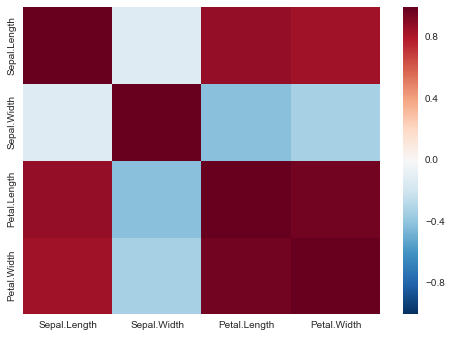

In [8]:
#Correlation matrix
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [9]:
train_row_cnt, train_col_cnt = train.shape

print ("The total number of training data columns is {}.".format(train_col_cnt))
print ("The total number of training data rows is {}.".format(train_row_cnt))
print ("      ")

train_cols = train.columns
print ("The training data column name :-")
print(train_cols)
print ("      ")

#Health check for classification of species
print ("Different species :-")
print(pd.value_counts(train['Species']))

The total number of training data columns is 5.
The total number of training data rows is 77.
      
The training data column name :-
Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')
      
Different species :-
setosa        29
versicolor    28
virginica     20
Name: Species, dtype: int64


C:\Users\Subba Reddy Yeruva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


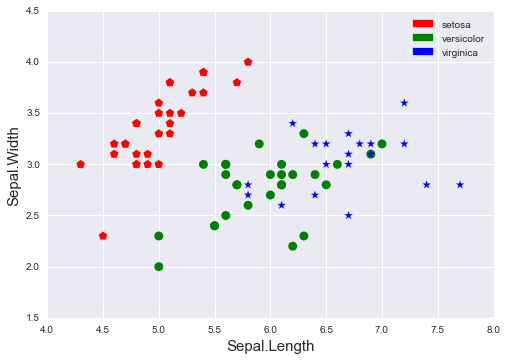

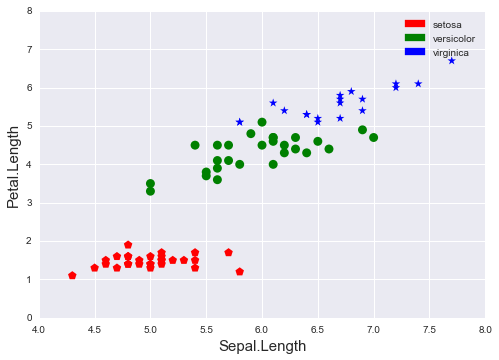

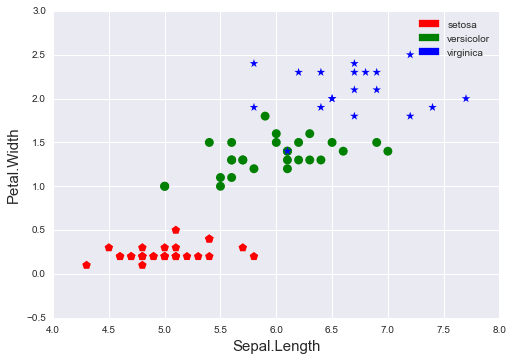

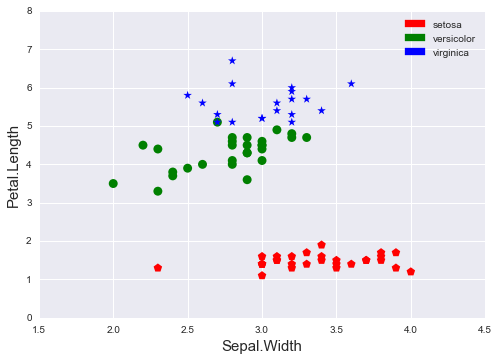

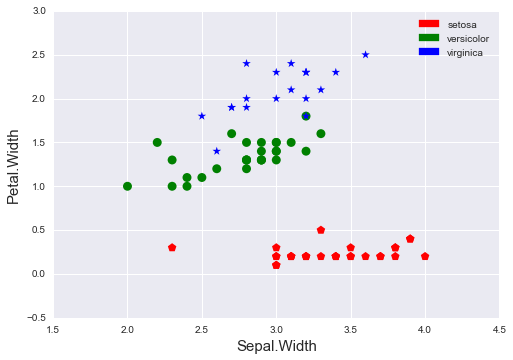

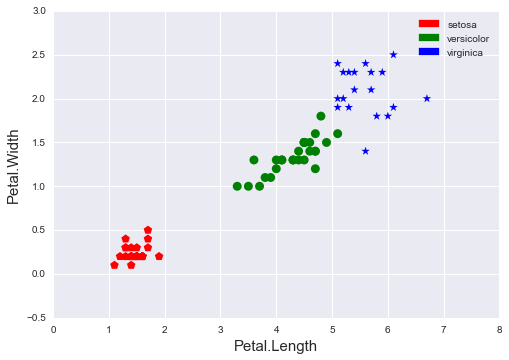

In [10]:
#the lengths are given in 4 columns and 5th column is label. So here the loop should be iterated for 4 times. 
#As per the indexing(starts from 0) of python to avoid the label 2 should be subtracted from total column count.
#First loop to start from first column
for i in range(0,train_col_cnt-2):
    i_plus = i + 1
    # Second loop to iterate from the 2nd column to 4th column, which will pair the features for scatter plot
    for j in range(i_plus,train_col_cnt-1):
        # To generate new picture the below command is required
        plt.figure()
        # Third loop to iterate through the rows. Assign the color and markers as per the label of the day.     
        for k in range(0,train_row_cnt-1):
            x, y = [train.ix[k,i], train.ix[k,j]]
            scale = 80.0
            # determine color
            flower = train.ix[k,train_col_cnt-1]
            # the variables color and mark are used to assign the color and marker to the corordinates.
            color = ""
            mark =  " "
            if flower == "setosa":
                color = "red"
                mark = "p"
            elif flower == "versicolor":
                color = "green"
                mark = "o"
            elif flower == "virginica":
                color = "blue"
                mark = "*"
            
            plt.scatter(x, y, s=scale, c=color, marker=mark, alpha=1, edgecolor="none")
    
        # Legend
        red_patch = mpatches.Patch(color='red', label='setosa')
        green_patch = mpatches.Patch(color='green', label='versicolor')
        blue_patch = mpatches.Patch(color='blue', label='virginica')
        plt.legend(handles=[red_patch, green_patch, blue_patch])

        #plt.title("The Iris Data Set", fontsize=18)
        plt.xlabel(train_cols[i], fontsize=15)
        plt.ylabel(train_cols[j], fontsize=15)

        plt.legend()
        plt.grid(True)

        plt.show()

# P 1.1 Scatter Plots and Inference

1. In all the scatter plots above "setosa" is clearly distinguishable from other two species "versicolor" and "virginica".
2. From Above it can be infered that the species "versicolor" and "virginica" are similar.


# P 1.2 Meta-class combining "versicolor" and "virginica"

Lets create a “meta-class” combining class 1 and class 2 (or whichever are the two most similar classes). Lets call it class 4.

In [11]:
train_meta_class = copy.deepcopy(train)
train_meta_class.loc[((train_meta_class['Species'] == 'versicolor') | (train_meta_class['Species'] == 'virginica')),
          'Species']='class 4'
#Health check for classification of species
print ("Different species :-")
print(pd.value_counts(train_meta_class['Species']))
print ("      ")

print ("Details of modified data set :-")
print(train_meta_class.head())
print(train_meta_class.tail())

Different species :-
class 4    48
setosa     29
Name: Species, dtype: int64
      
Details of modified data set :-
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
72           6.8          3.2           5.9          2.3  class 4
73           6.7          3.0           5.2          2.3  class 4
74           6.5          3.0           5.2          2.0  class 4
75           6.2          3.4           5.4          2.3  class 4
76           5.9          3.0           5.1          1.8  class 4


1. The actual data classification stats are as below:                          
    setosa        :29,                                                                                                             
    versicolor    :28,       
    virginica     :20 
2. After combining identical species the classification stats are as below:                
    class 4       :48,                          
    setosa        :29
3. Note:  There is no change in the count of "setosa" species in the dataset, hence it can be infered that the data modification is correct.  

# P 1.3 First Fisher discriminate

Create the first Fisher projection by trying to discriminate class 3 (the
different class) from class 4 (the meta-class).
¤ Do this on training data only

References :                                                 
https://en.wikipedia.org/wiki/Linear_discriminant_analysis                          
                                 
http://eminer.pythonanywhere.com/fishers-linear-discriminant-analysis/                               

http://eminer.pythonanywhere.com/implementing-fishers-lda-in-python/

In [13]:
def ByClass(dataset):        #separate data by clas

    classes = np.unique(dataset[:,-1])
    div_class = {}
    for i in classes:
        div_class[i] = dataset[dataset[:,-1] == i]

    return div_class

def Mean(data):
    mean = data.mean(axis = 0)
    
    return mean

Vector =  [[ 0.03436453]
 [ 0.15702405]
 [-0.15843383]
 [-0.03931312]]
Fisher discriminant value =  0.146383292514


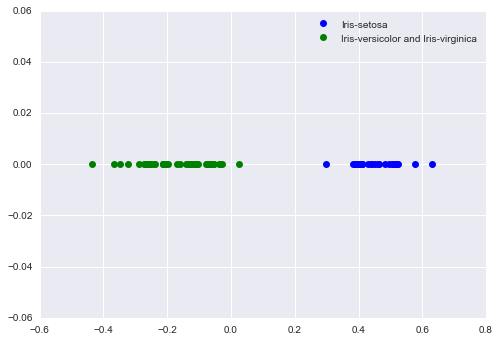

In [14]:
def LoadFile(filename):        #load input file containing training data
    dataset =[]
    dataset = filename
    dataset.loc[((dataset['Species'] == 'class 4') ),
          'Species']='2'
    dataset.loc[((dataset['Species'] == 'setosa') ),
          'Species']='1'
    
    dataset = np.array(dataset).astype(np.float64)
    return dataset


def Threshold(vector, data1, data2):
    mu1 = Mean(np.dot(vector, data1.T))
    mu2 = Mean(np.dot(vector, data2.T))
    #print (mu1, mu2)
    print ("Fisher discriminant value = ",(mu1+mu2)/2)
    return (mu1+mu2)/2, mu1, mu2
#def Projection1D()    
def main(dataset):        #assuming given two class problem
    div_data = ByClass(dataset)
    class1, class2 = div_data
    class1_data, class2_data = div_data[class1], div_data[class2] 
    class1_data = class1_data[:,:-1]
             #removing the class labels from the data as they are not required to calculate mean
    class2_data = class2_data[:,:-1]
    mean1 = Mean(class1_data)
    mean2 = Mean(class2_data)
    mean = Mean(dataset[:,:-1])
    mean1, mean2, mean = mean1.T, mean2.T, mean.T

    m,n = class1_data.shape
    diff1 = class1_data - np.array(list(mean1)*m).reshape(m,n)

    m,n = class2_data.shape
    diff2 = class2_data - np.array(list(mean2)*m).reshape(m,n)

    diff = np.concatenate([diff1, diff2])
    m, n = diff.shape

    withinClass = np.zeros((n,n))
    diff = np.matrix(diff)

    for i in range(m):
        withinClass += np.dot(diff[i,:].T, diff[i,:])

    opt_dir_vector = np.dot(np.linalg.inv(withinClass), (mean1 - mean2))
    print ('Vector = ', np.matrix(opt_dir_vector).T)

    threshold = Threshold(opt_dir_vector, class1_data, class2_data)

    #print ('Threshold = ', threshold, 'm1 = ', class1_data, 'm2 = ', class2_data)
    #print ('Threshold = ', threshold)
    #projection of classes on 1D space
    x1 = np.dot(class1_data, opt_dir_vector)
    y1 = np.array([0]*class1_data.shape[0])
    x2 = np.dot(class2_data, opt_dir_vector)
    y2 = np.array([0]*class2_data.shape[0])
    #print("vect shape:",opt_dir_vector.shape )
    #print("x 1 shape:",x1.shape )
    #print("y 1 shape:",y1.shape )
    #print("x 2 shape:",x2.shape )
    #print("y 2 shape:",y2.shape )
    
    plt.plot(x1,y1, "bo", label="Iris-setosa")
    plt.plot(x2,y2, "go", label="Iris-versicolor and Iris-virginica")
    plt.legend()
    
if __name__ == '__main__':    
    
    filename = []
    filename = copy.deepcopy(train_meta_class)

    dataset = LoadFile(filename)

    main(dataset)

1. From above the first fisher projection vector deatails are as below.                               
 [ 0.03436453]                               
 [ 0.15702405]                                
 [-0.15843383]                                   
 [-0.03931312]   
2. Fisher Discriminant Value is 0.146383292514

# P 1.4 Second Fisher discriminate

Create the second Fisher projection by trying to discriminate class 1 from class 2 (the original two similar classes).            
¤ Do this on training data only

Vector =  [[ 0.06134601]
 [ 0.16986251]
 [-0.16487636]
 [-0.35677647]]
Fisher discriminant value =  -0.546254365046


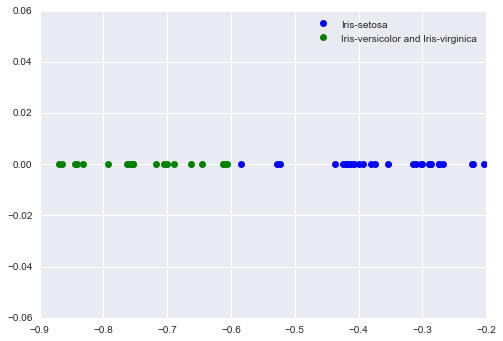

In [15]:
def LoadFile2(filename):        #load input file containing training data
    dataset =[]
    dataset = filename
    dataset.loc[((dataset['Species'] == 'versicolor') ),
          'Species']='1'
    dataset.loc[((dataset['Species'] == 'virginica') ),
          'Species']='2'
    
    dataset = np.array(dataset).astype(np.float64)
    return dataset

if __name__ == '__main__':    
    filename = []
    filename = copy.deepcopy(train)
    #print("diff spec", pd.value_counts(filename['Species']))
    
    filename = filename[filename.Species != "setosa"]
    
    #print("input shape : ", filename.shape)
    #print("diff spec", pd.value_counts(filename['Species']))
    #print(filename.head())
    
    dataset = LoadFile2(filename)

    main(dataset)

1. From above the first fisher projection vector deatails are as below.                               
 [ 0.06134601]                 
 [ 0.16986251]             
 [-0.16487636]              
 [-0.35677647]                     
2. Fisher Discriminant Value is -0.546254365046

# P 1.5 Projection Of entire data

Now project the entire data in these two projections and color code the
class points.
¤ Do this on test data only.

References:         
http://sebastianraschka.com/Articles/2014_python_lda.html

In [16]:
X = test.ix[0:,:4]
y = test.ix[0:,4:]

# converting into array
y = np.ravel(y, order='C')

# Label encoding 
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

In [17]:
#Linear discriminant analysis through scikit learn
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

#a = X_lda_sklearn.trace
#print(a)
sklearn_lda.coef_
#sklearn_lda.tol

sklearn_lda.n_components

C:\Users\Subba Reddy Yeruva\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:457: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


2

In [18]:
sklearn_lda.coef_

array([[  8.02038434,  12.29556282, -17.69451264, -16.34829422],
       [ -0.90880957,  -3.46038268,   2.86491636,   0.16769001],
       [ -4.94780869,  -6.06928001,  10.28522018,  11.32083328]])

In [19]:
sklearn_lda.means_

array([[ 5.01904762,  3.50952381,  1.44285714,  0.26190476],
       [ 5.91363636,  2.76363636,  4.19545455,  1.30454545],
       [ 6.56333333,  2.94333333,  5.54      ,  1.99333333]])

In [20]:
sklearn_lda.classes_

array([1, 2, 3], dtype=int64)

In [21]:
#plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

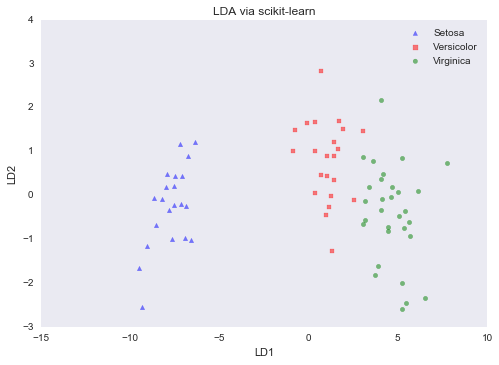

In [22]:
plot_scikit_lda(X_lda_sklearn, title='LDA via scikit-learn')

# P 1.6 Observations on Fisher Discriminant

It is evident from the results that Setosa is clearly distinguishable from Versicolor and Virginica. 
Versicolor and Virginica are not clearly seperable but after the fisher discriminat they are seperated with less value.